In [2]:
import cv2
import numpy as np
import os
import random
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [31]:
DATADIR = 'PetImages/'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        break
    break

In [ ]:
print(img_array)

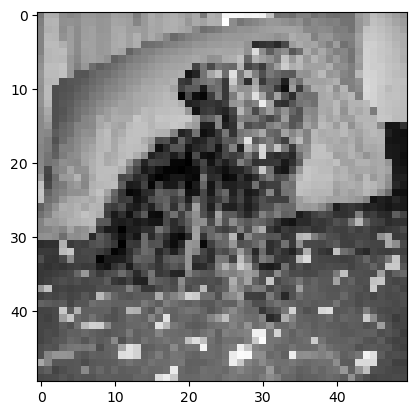

In [33]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [35]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [36]:
print(len(training_data))

24946


In [37]:
random.shuffle(training_data)

In [49]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Change 1 to 3 if you want to not do greyscale
y =np.array(y)

In [51]:
X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X, y, batch_size=32,epochs=3, validation_split=0.1)

Epoch 1/3
702/702 [==============================] - 46s 65ms/step - loss: 0.6933 - accuracy: 0.5029 - val_loss: 0.6930 - val_accuracy: 0.5078
Epoch 2/3
702/702 [==============================] - 43s 61ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6930 - val_accuracy: 0.5078
Epoch 3/3
702/702 [==============================] - 39s 55ms/step - loss: 0.6933 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.4922
